In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader
from datasets import MnistFlattenedDataset
from models import MnistFullyConnectedNet
import matplotlib.pyplot as plt
from tqdm import tqdm
from statistics import mean

In [2]:
train_dataset = MnistFlattenedDataset(train=True)
test_dataset = MnistFlattenedDataset(train=False)

train_loader = DataLoader(train_dataset, batch_size=250, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=250, shuffle=True)

In [3]:
net = MnistFullyConnectedNet()
params = list(net.parameters())
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Training

In [4]:
epochs = 300
loss_history = []

for epoch in tqdm(range(epochs), desc='Training'):
    losses_in_epoch = []
    for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses_in_epoch.append(loss.item())
    loss_history.append(mean(losses_in_epoch))

Training: 100%|██████████| 300/300 [05:17<00:00,  1.06s/it]


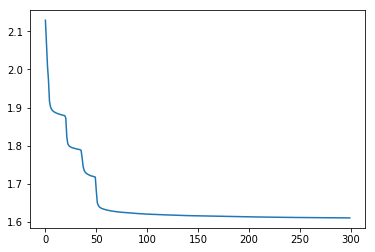

In [5]:
plt.plot(loss_history)